# Sea surface height

Plot the SSH

In [63]:
import sys
sys.path.insert(0, '..')
import os
import glob
from filament import filament
import datetime
import netCDF4
import cmocean
import logging
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cartopyticker
myproj = ccrs.PlateCarree()
coast = cfeature.GSHHSFeature(scale="f")
reload(filament)
plt.style.use("filament.mplstyle")

In [3]:
logger = logging.getLogger("altimetryPlot")
logger.setLevel(logging.INFO)
logging.info("Starting")
plotvis = 0

In [5]:
datadir = "/home/ctroupin/data/Altimetry/"

figdir = "../figures/SST/Bloom/"
datafilelist = sorted(glob.glob(os.path.join(datadir, "*2024*.nc")))
nfiles = len(datafilelist)
logger.info("Processing {} files".format(nfiles))
mediumdomain = (-19., -6., 25., 35.)
smalldomain = (-15., -9., 27., 33.)
tinydomain = (-12., -9., 29.5, 32.)
canarydomain = (-19., -13., 26., 30.)
medseadomain = (-2.5, 0., 36., 37.)
westmed = (-5., 10., 35., 46.)
cretedomain = (23., 27., 34., 36.5)
sidedomain = (29.9, 33, 34.9, 37.25)
capeblanc = (-22.5, -15.5, 17.5, 23.75)
capeghir = ( -12.5, -9.25, 29., 32)
alboran = (-5.6, -2.6, 34.8, 37.54)
bergen = (1.5, 6.5, 58, 62.5)
galicia = (-12., -5., 40.5, 46.)

domain = canarydomain

INFO:altimetryPlot:Processing 1 files


In [6]:
if not(os.path.exists(figdir)):
    os.makedirs(figdir)

In [12]:
os.path.exists(dat)

'/home/ctroupin/data/Altimetry/nrt_europe_allsat_phy_l4_20240625_20240625.nc'

In [18]:
ssh = filament.Altimetry()
ssh.read_from_aviso(datafilelist[0])
ssh.get_speed()

/home/ctroupin/Projects/Filament-Submesoscale/notebooks/../filament/filament.py:1087: RuntimeWarning: invalid value encountered in sqrt
  self.speed = np.sqrt(self.u * self.u + self.v * self.v )


In [73]:
ax.streamplot?

Text(0.5, 1.0, 'Sea level anomaly and streamlines\nEuropean Seas Gridded L 4 Sea Surface Heights\nAnd Derived Variables Nrt')

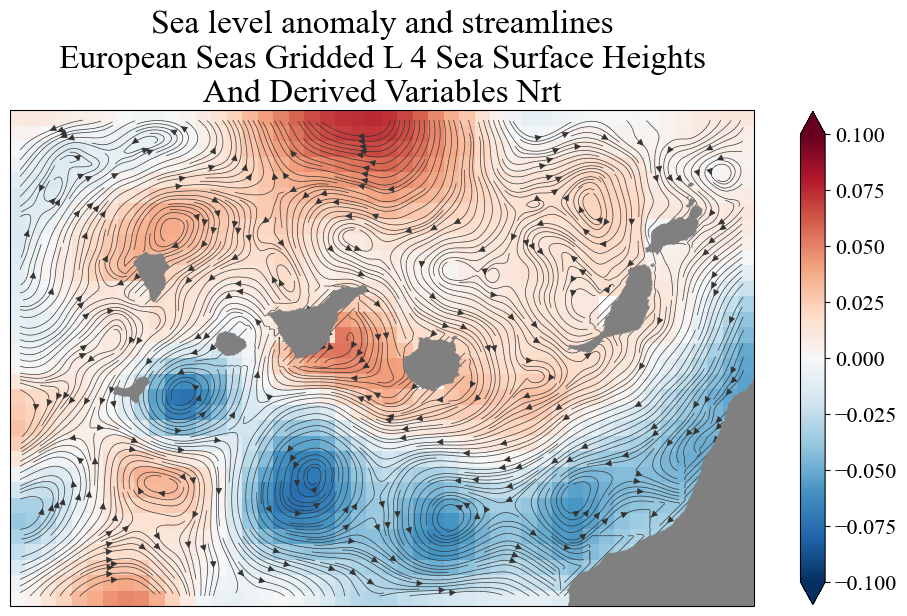

In [80]:
goodlon = np.where((ssh.lon <= domain[1]) & (ssh.lon >= domain[0]))[0]
goodlat = np.where((ssh.lat <= domain[3]) & (ssh.lat >= domain[2]))[0]
ssh_domain = ssh.sla[goodlat][:,goodlon]
u = ssh.u[goodlat][:,goodlon]
v = ssh.v[goodlat][:,goodlon]

fig = plt.figure()
ax = plt.subplot(111, projection=myproj)
pcm = ax.pcolor(ssh.lon[goodlon], ssh.lat[goodlat], ssh_domain - ssh_domain.mean(), 
                vmin=-.1, vmax=.1, cmap=plt.cm.RdBu_r, zorder=2)
ax.streamplot(ssh.lon[goodlon], ssh.lat[goodlat], u, v, density=5, linewidth=.5, zorder=3, color=".2")
ax.add_feature(coast, lw=.25, color=".5", zorder=4)
cb = plt.colorbar(pcm, shrink=.8, extend="both")
cb.set_title("m", rotation=0, ha="left")
ax.set_title("Sea level anomaly and streamlines\nEuropean Seas Gridded L 4 Sea Surface Heights\nAnd Derived Variables Nrt")